# K-NEAREST NEIGHBOURS

## Objective: 

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


## Dataset:

Need to Classify the animal type


## Tasks:

### 1. Analyse the data using the visualizations

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df = pd.read_csv('./Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

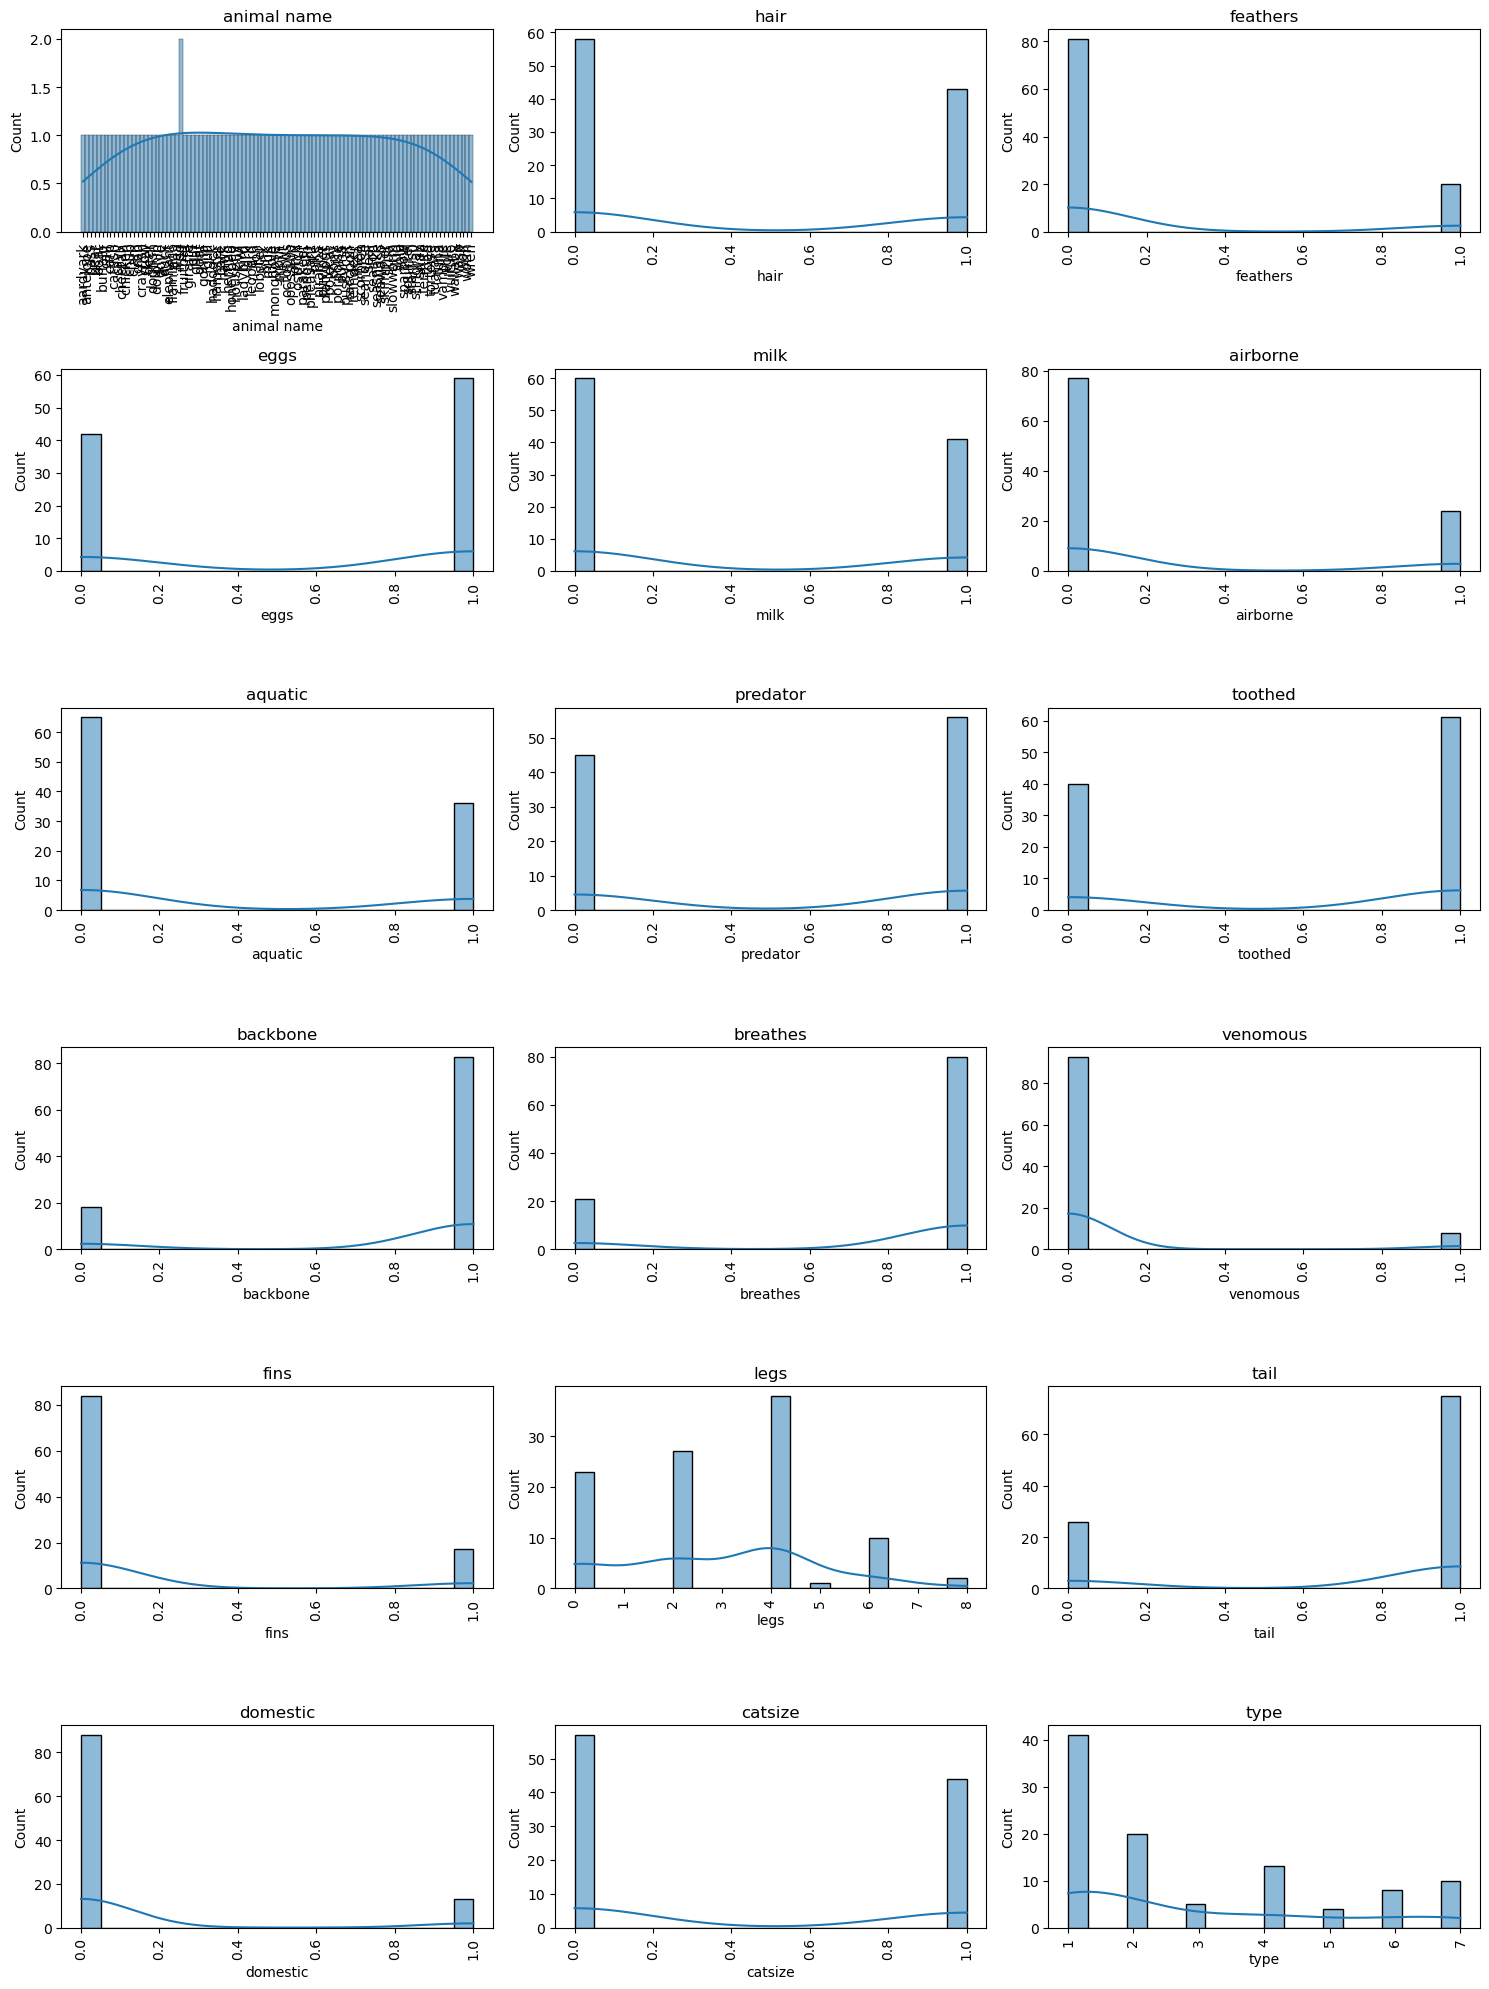

In [4]:
# Checking Distribution of Features
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()
plt.show()

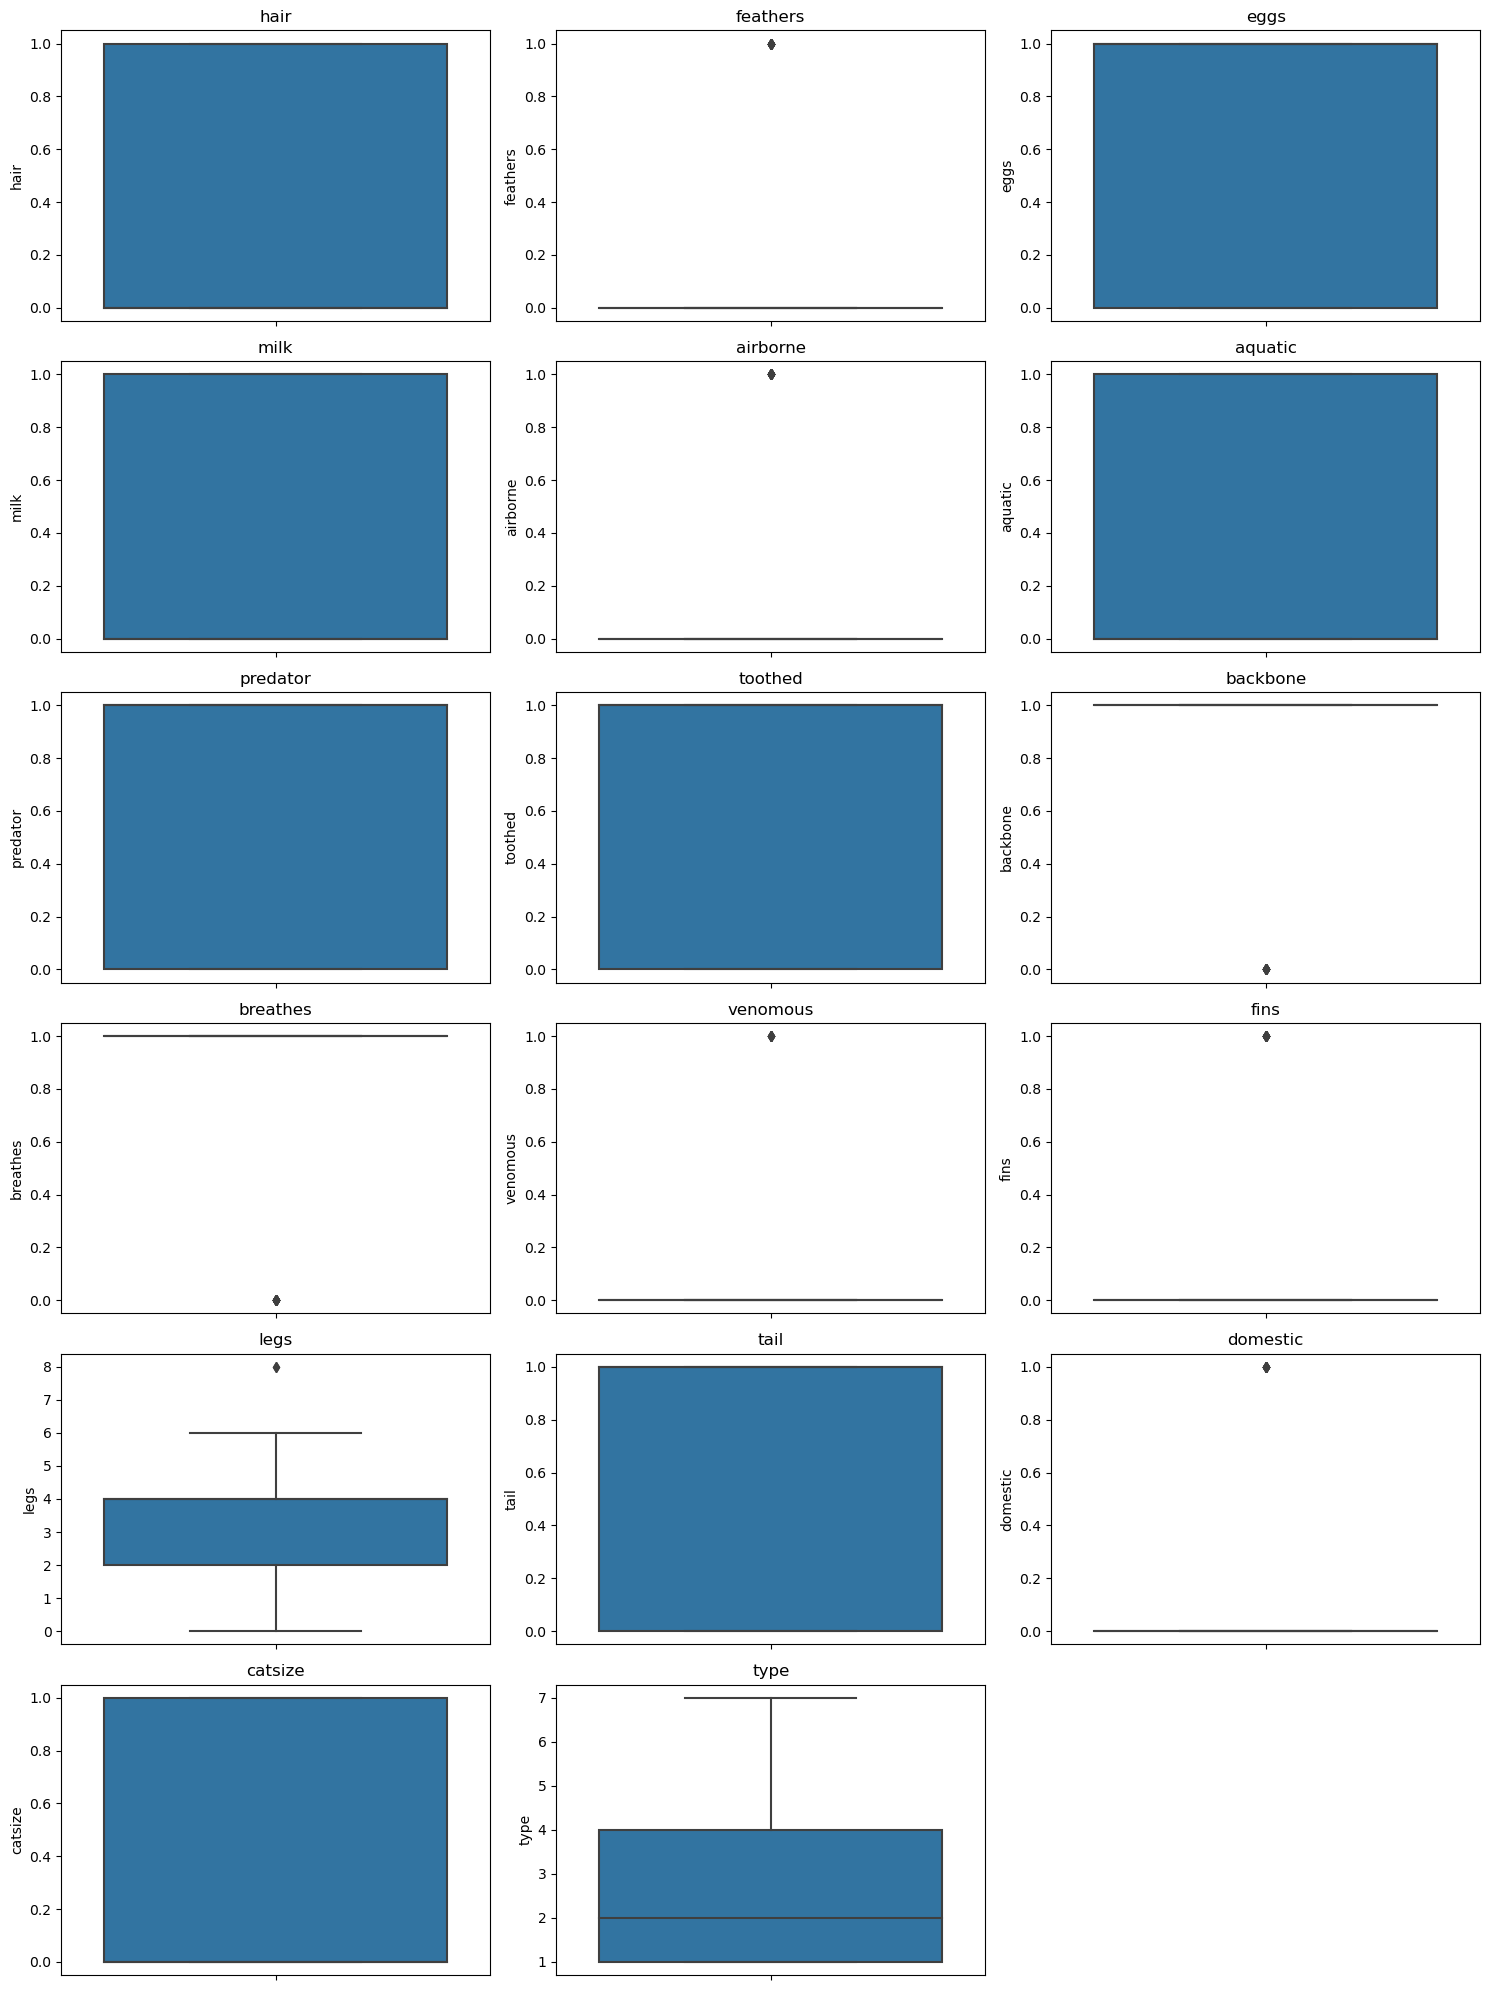

In [5]:
# Checking for Outliers using Boxplots
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

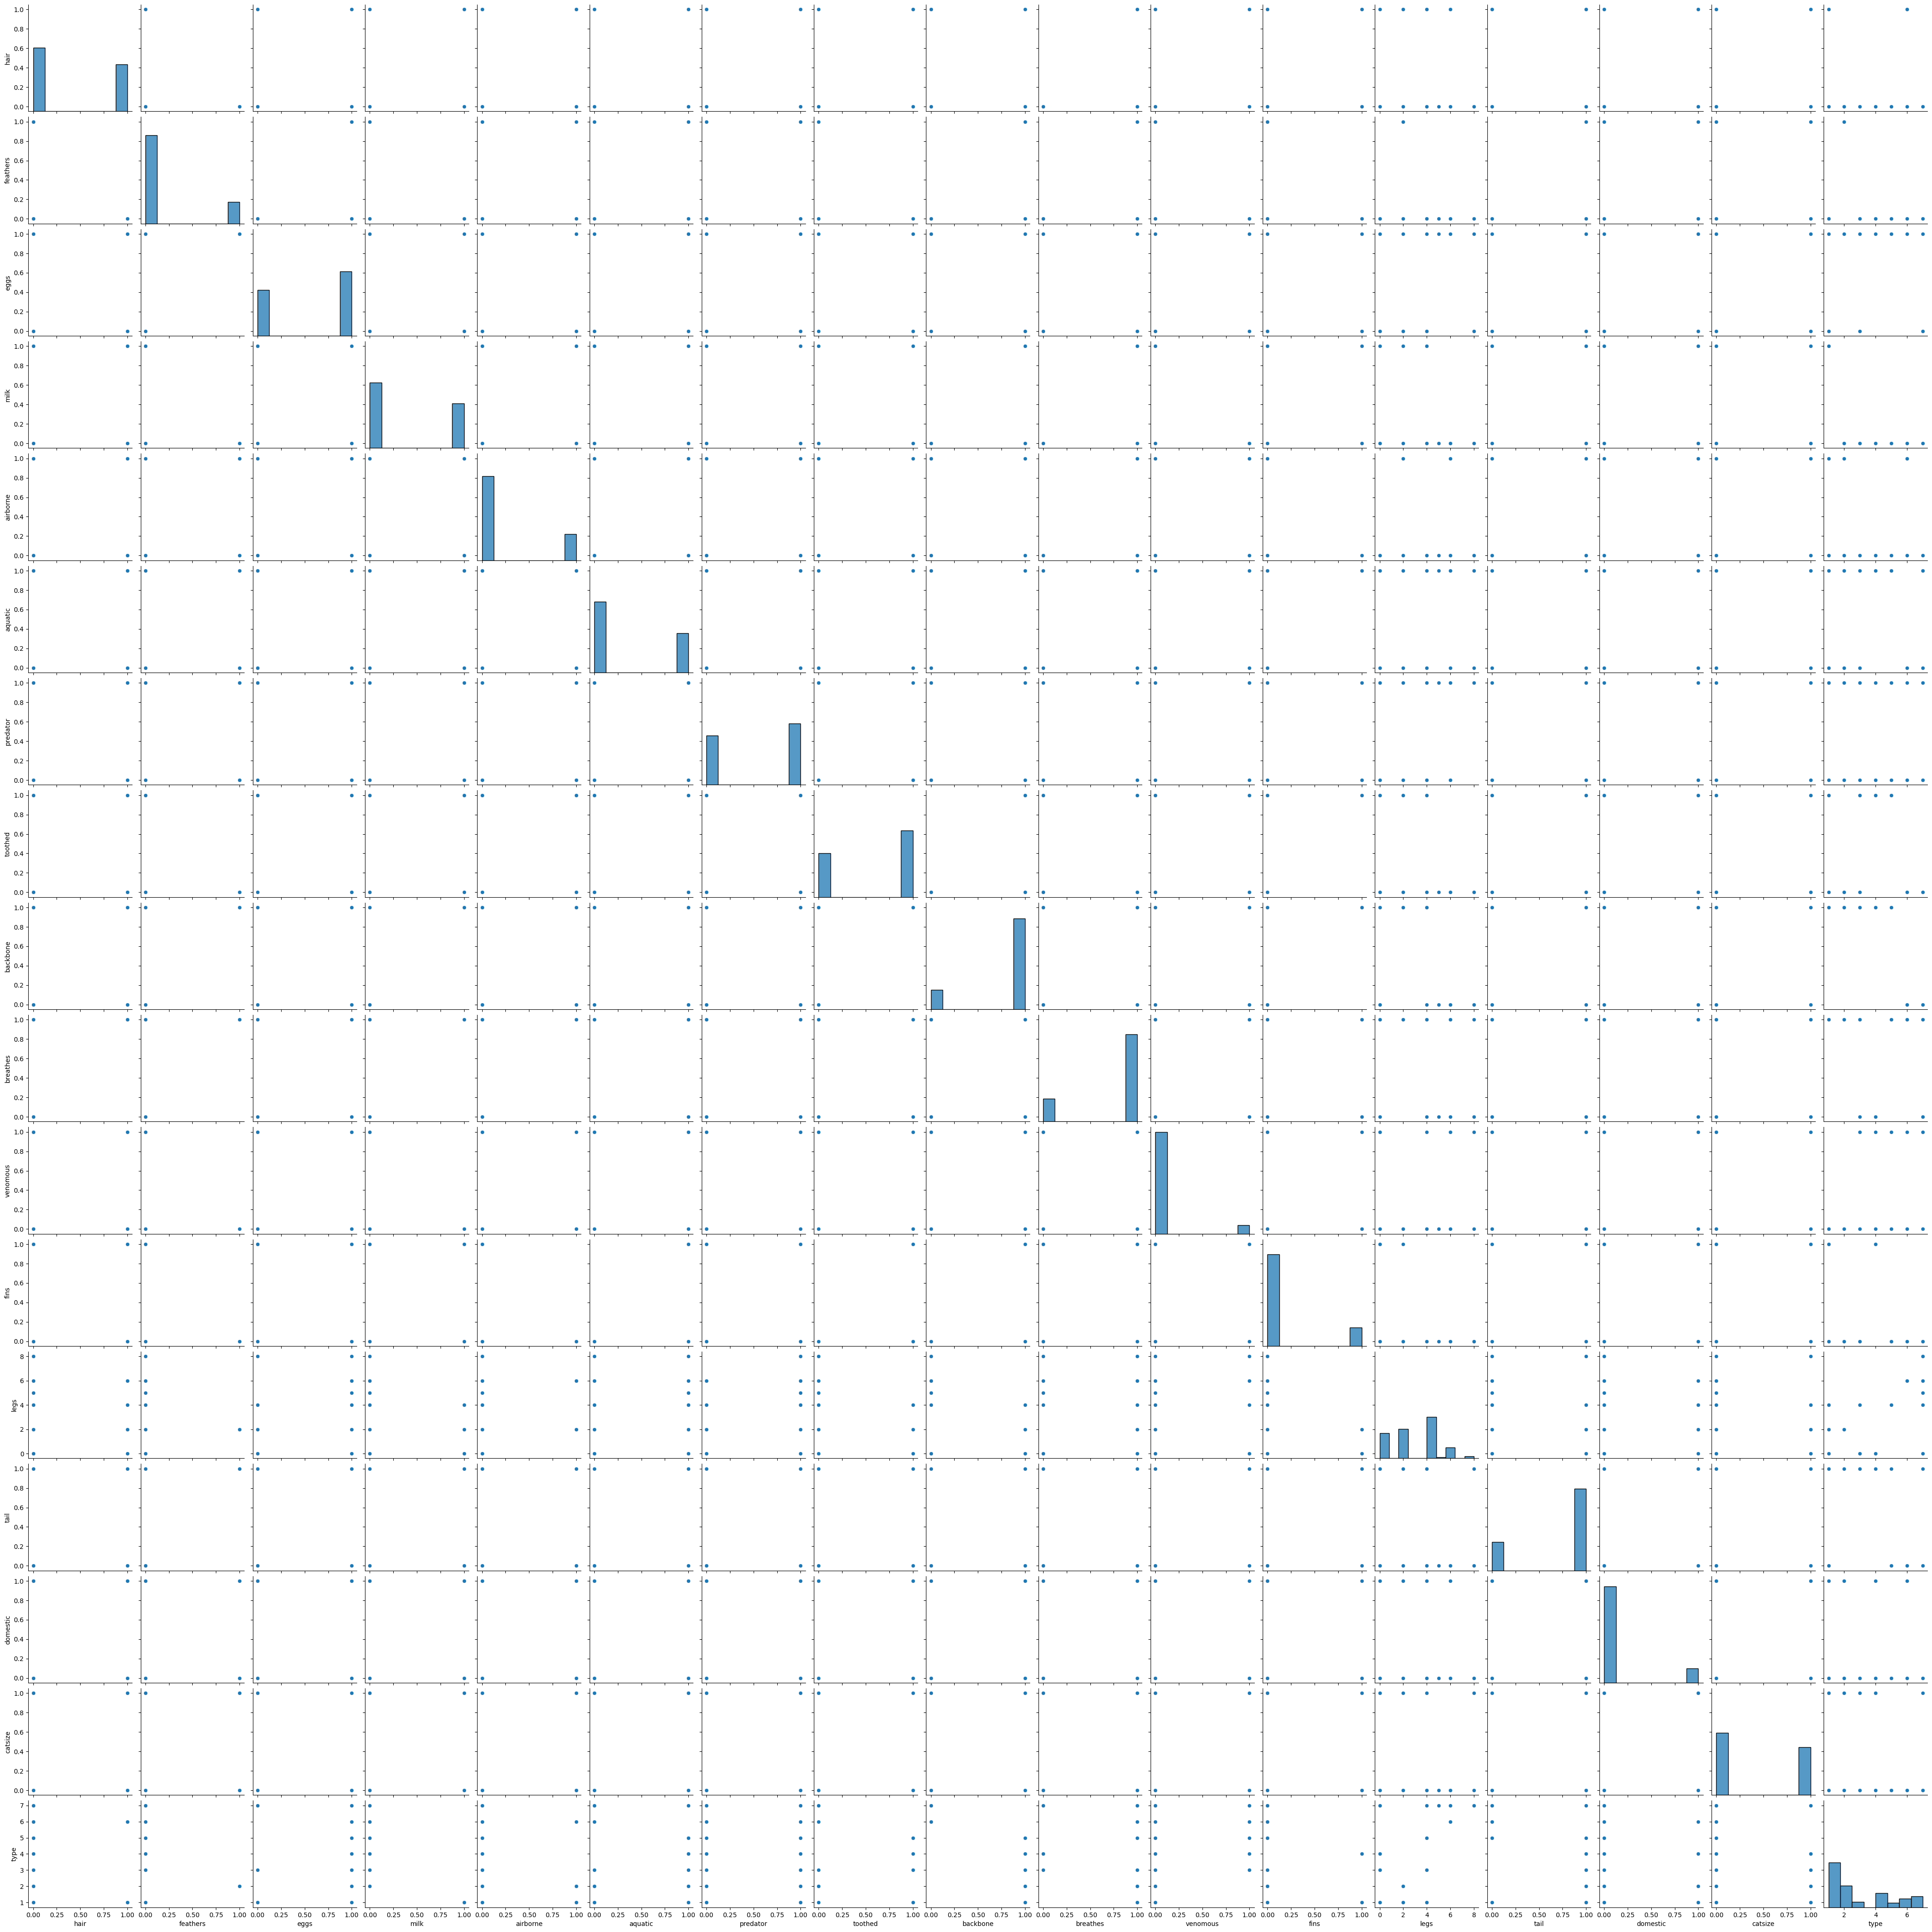

In [6]:
# Checking for Correlatins between features using pairplots
sns.pairplot(df)

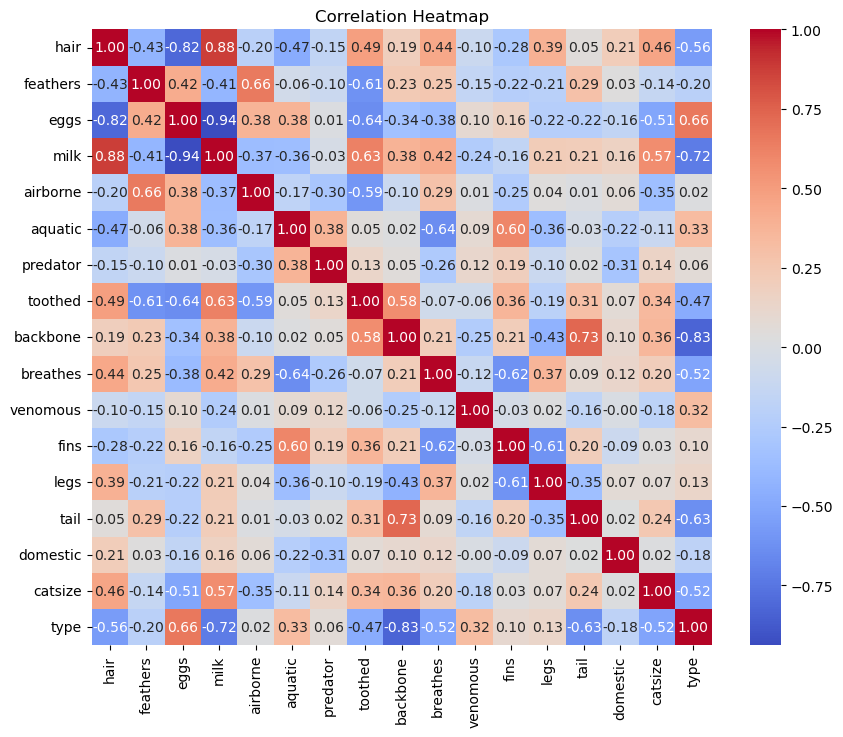

In [7]:
# Checking Correlations using Heatmap
features = df.columns[1:]
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 2. Preprocess the data by handling missing values & Outliers, if any.

In [8]:
# Checking for missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
# Checking for Duplicate Values
df.duplicated().sum()

0

In [10]:
# Checking for feature data types
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [11]:
# Handling outliers using z-scores
from scipy import stats

# Removing outliers based on z-scores
z_scores = stats.zscore(df.select_dtypes(include=['int64']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


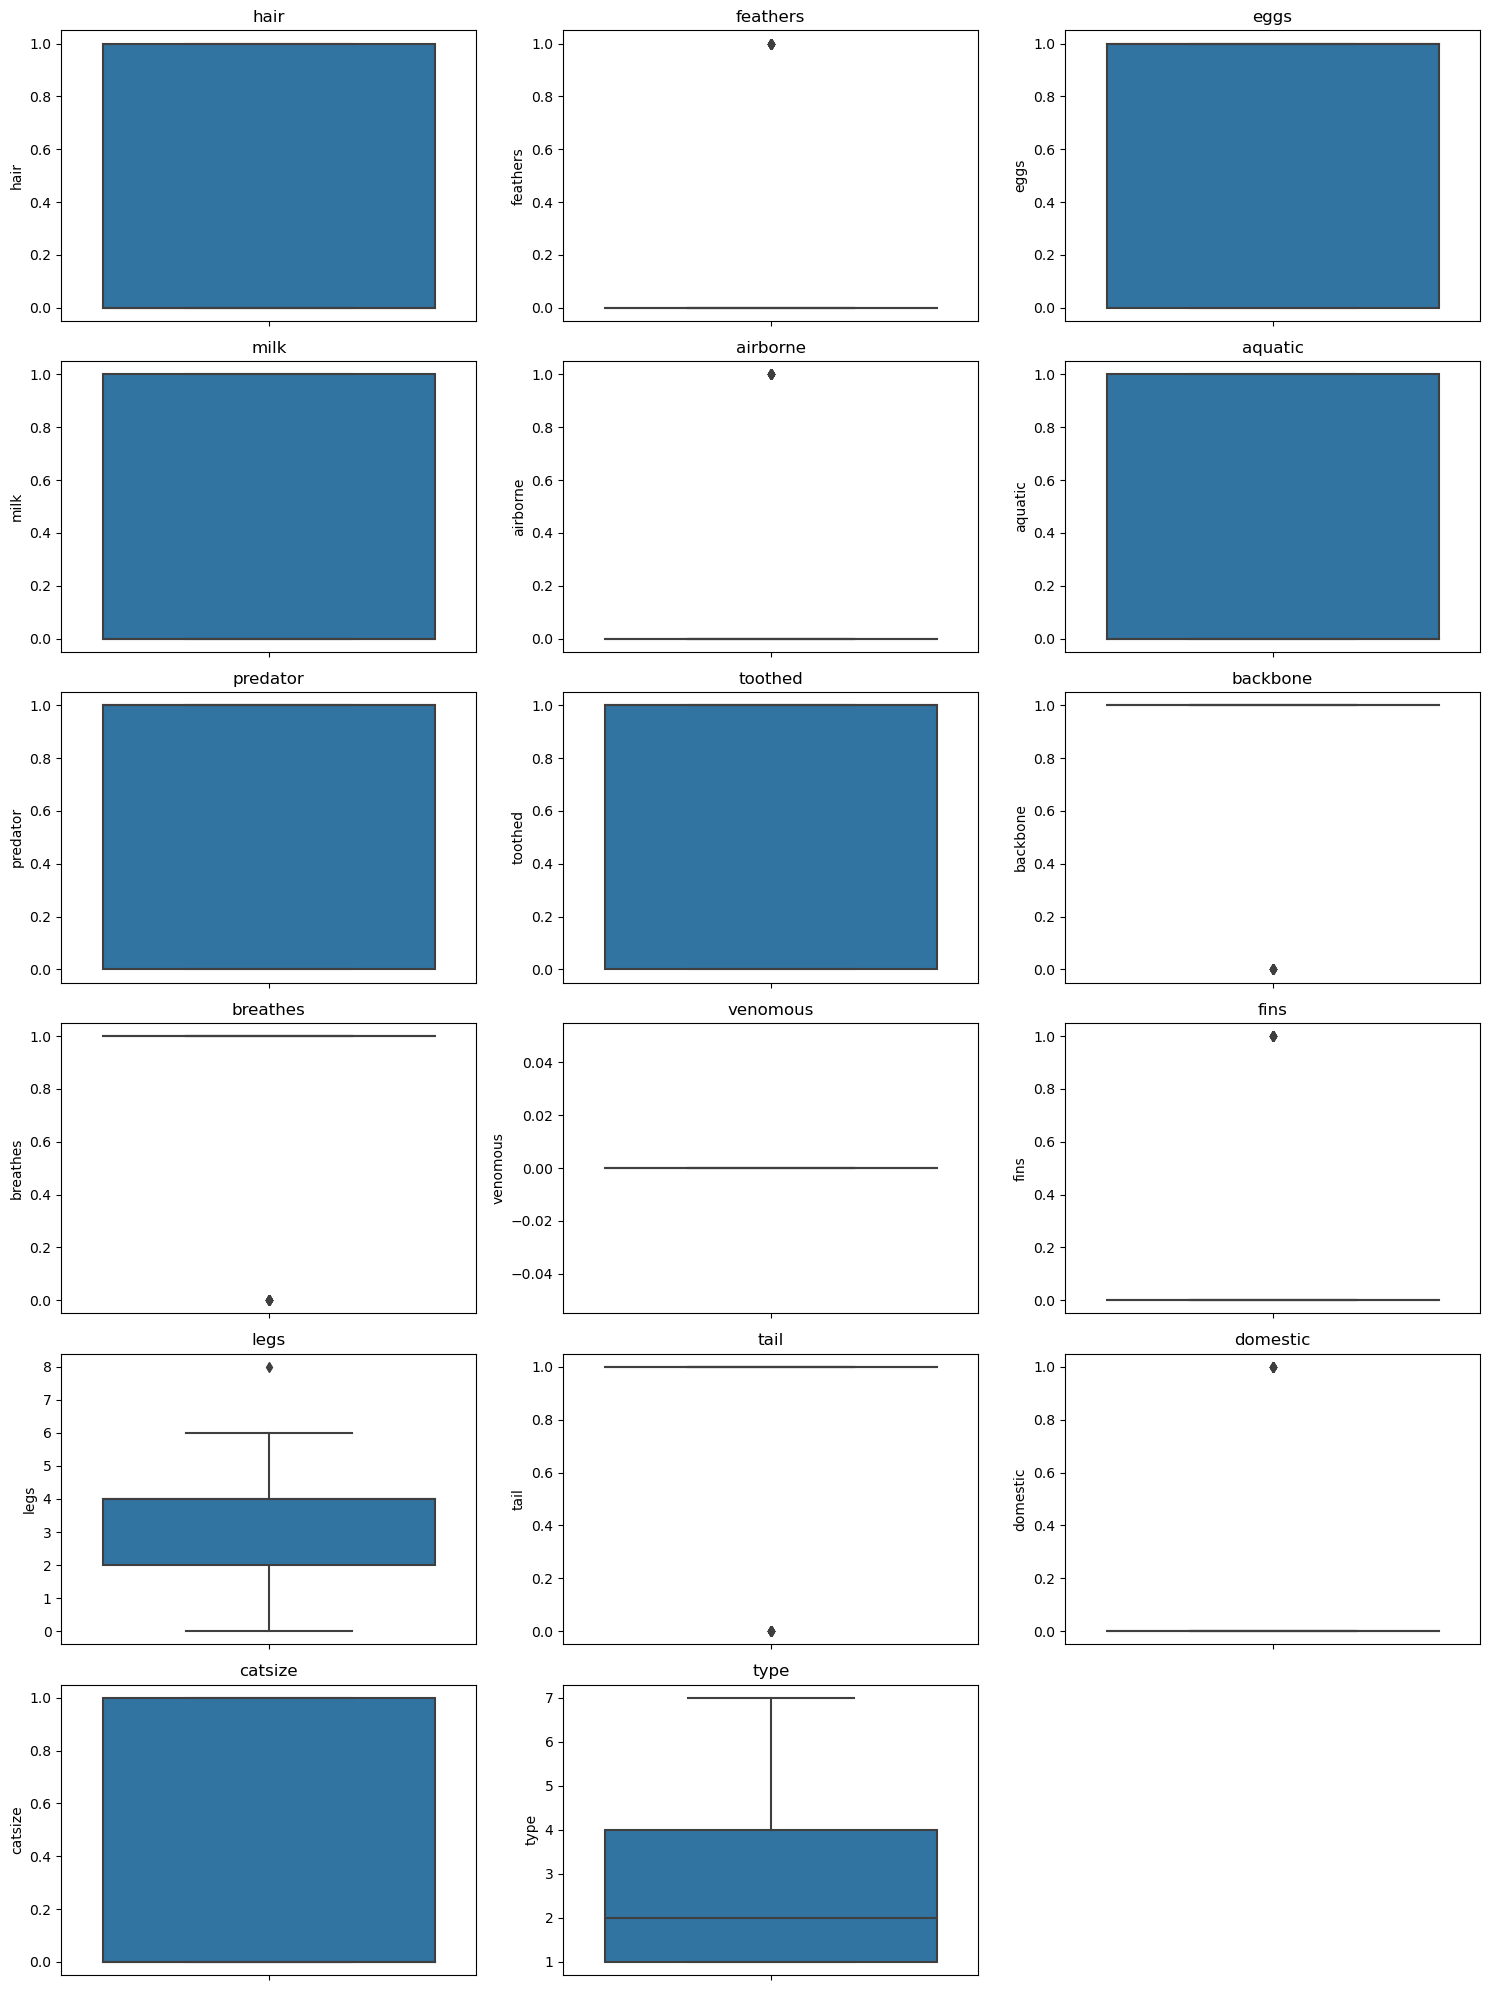

In [12]:
# Verifying using Boxplots
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [13]:
# Splitting the Dataset into train and test sets
from sklearn.model_selection import train_test_split

# Separating Features and Target
X = df.drop(columns=['animal name', 'type'])
y = df['type']

# Making Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardizing Features
from sklearn.preprocessing import StandardScaler

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [15]:
# Implementing K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# Initializing Model
knn = KNeighborsClassifier()

# Training Model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
# Evaluating Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Making Predictions on the test set.
y_pred = knn.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'\nClassification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.9473684210526315
Precision: 0.9078947368421053
Recall: 0.9473684210526315
F1 Score: 0.9248120300751879

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.95        19
   macro avg       0.79      0.83      0.81        19
weighted avg       0.91      0.95      0.92        19



### 5. Choose an appropriate distance metric and value for K.

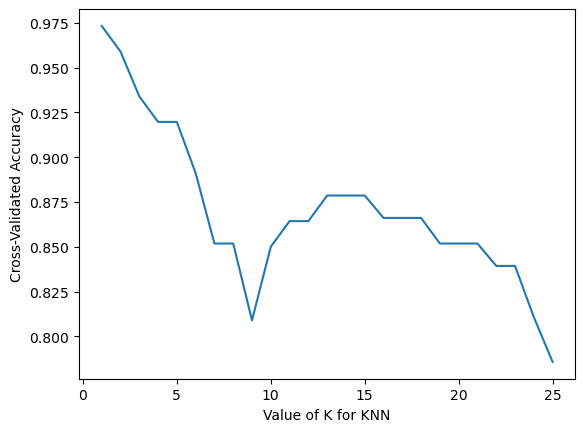

In [17]:
# Optimizing Model using Cross-validation
from sklearn.model_selection import cross_val_score

scores = []
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy').mean())

plt.plot(range(1, 26), scores) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy') 
plt.show()                


In [18]:
# Training optimized model
knn_optimized = KNeighborsClassifier(n_neighbors=1)
knn_optimized.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

### 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [19]:
# Evaluating Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Making Predictions on the test set.
y_pred_optimized = knn.predict(X_test_scaled)

# Evaluation Metrics
accuracy_optimzed = accuracy_score(y_test, y_pred_optimized)
precision_optimzed = precision_score(y_test, y_pred_optimized, average='weighted')
recall_optimzed = recall_score(y_test, y_pred_optimized, average='weighted')
f1_optimzed = f1_score(y_test, y_pred_optimized, average='weighted')

print(f'Accuracy: {accuracy_optimzed}')
print(f'Precision: {precision_optimzed}')
print(f'Recall: {recall_optimzed}')
print(f'F1 Score: {f1_optimzed}')
print(f'\nClassification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.8421052631578947
Precision: 0.7631578947368421
Recall: 0.8421052631578947
F1 Score: 0.7894736842105263

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.95        19
   macro avg       0.79      0.83      0.81        19
weighted avg       0.91      0.95      0.92        19



### 7. Visualize the decision boundaries of the classifier.

In [20]:
# Visualizing the Decision Boundaries
from sklearn.decomposition import PCA
import numpy as np

# Reducing features using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Training KNN model on reduced data
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [21]:
# Decision Plot Function
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    '''Decision Boundary'''

    # Defining the Plot Range
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    # Creating a Grid of Points
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    # Classifying each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshaping the Prediction Results
    Z = Z.reshape(xx.shape)

    # Visualization
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(title)
    plt.show()

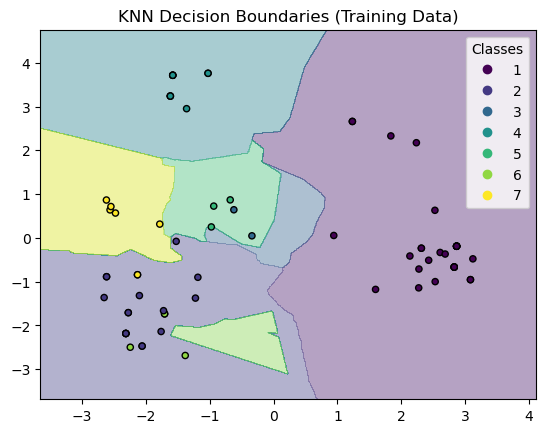

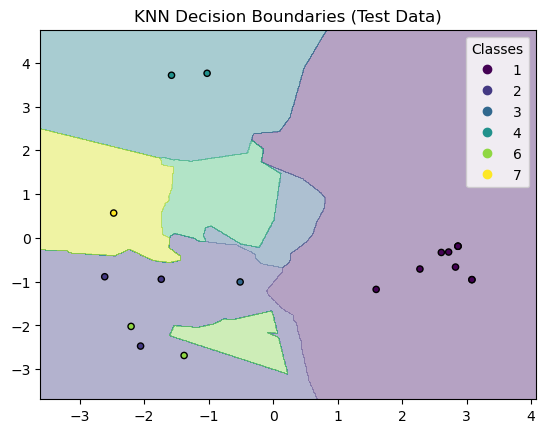

In [22]:
# Plotting Decision Boundaries

plot_decision_boundaries(X_train_pca, y_train, knn, title='KNN Decision Boundaries (Training Data)')
plot_decision_boundaries(X_test_pca, y_test, knn, title='KNN Decision Boundaries (Test Data)')

## Interview Questions:

### 1. What are the key hyperparameters in KNN?

Key Hyperparameters in KNN:

* Number of Neighbors (k):

    This is perhaps the most crucial hyperparameter in KNN. It determines the number of nearest neighbors to consider when making a prediction. A larger value of k smoothens the decision boundary but may also increase computational complexity.

* Distance Metric:

    The choice of distance metric defines how distance is calculated between data points. Common metrics include Euclidean distance, Manhattan distance, Minkowski distance, and Hamming Distance.

* Weights:

    KNN can assign different weights to the neighbors. Common options include uniform weights (all neighbors contribute equally to the decision) and distance weights (closer neighbors have a greater influence).

* Algorithm:

    Although not as impactful as the number of neighbors or distance metric, the algorithm used to compute the nearest neighbors can also be a hyperparameter. Options include brute force, KD tree, and Ball tree. The choice depends on the dataset size and dimensionality.

### 2. What distance metrics can be used in KNN?

Distance Metrics in KNN:

* Euclidean Distance:

    This is the most commonly used distance metric in KNN. It calculates the straight-line distance between two points in Euclidean space.

* Manhattan Distance:

    Also known as city block distance or L1 distance, Manhattan distance calculates the distance between two points by summing the absolute difference of their coordinates.

* Minkowski Distance:

    This is a generalization of both Euclidean and Manhattan distances. It includes a parameter, p, which determines the degree of the distance. When p=1, it becomes Manhattan distance, and when p=2, it becomes Euclidean distance.

* Hamming Distance:

    Hamming distance is used for categorical varibales. It calculates the number of positions at which the corresponding elements are different between two vectors.

* Chebyshev Distance: 

    This metric calculates the maximum absolute difference between the coordinates of two points. It's also knwon as the Minimum norm or maximum norm.